E1. Analiza dynamiki wybranej giełdy za pomocą  wybranej techniki teorii grafów 

**Research question: What are correlations between constituents on London stock market?**

Celem tego ćwiczenia jest zbadanie dynamiki wybranej giełdy w okresie narastania wybranej bańki giełdowej oraz  jej pęknięcia, z wykorzystaniem teorii grafów. Realizacja ćwiczenia składa się  z następujących etapów:  

1.  wybór  giełdy  i  ściągnięcie  odpowiednich  empirycznych  danych  giełdowych  z  wybranej  strony internetowej lub uzyskanie ich bezpośrednio z danej giełdy,  
    1. Download FTSE100 historical data from yahoo, transform it into a dataframe and save to a file. 
    2. Plot number of constituents(time) for FTSE100
        1. To do it I should first check the data. Are there any missing values for certain constituents? I can achieve it through finding a start date for each ticker. It can be in a form of a list.
    3. Check is the data complete?
    4. On y axis check does it contains all days except weekends?
    5. For each constituent count how many rows are missing?
2.  Calculate correlations matrix for FTSE100
    1. Create new Stock_values_dataframe with variables that indicate prices.
3.  dobór odpowiedniego modelu sieci oraz algorytmu generującego,  
4.  dobór właściwych przedziałów średniowania,  
5.  dyskusja  uzyskanych  wyników  a  w tym  zwłaszcza  ewentualnych  strukturalnych  topologicznych) przemian fazowych prowadzących do analizy kryzysu i krachu. 

### Questions
    Should I use log transformation?
    How should I calculate <Si> How many days average. (See exercise notes 1.2)
    How to calculate distances between companies? How to interpret them?

[Exercise materials](https://drive.google.com/open?id=0ByG3ASYoU228cnFHaEZDR0tQcWlaZlNGa2xoUEhNSUJfMDg4)

### Notes(Exercise materials)
    1.1 Diferences a couple orders of magnitude
    1.2 <Si> - average over for example 50 days.



In [1]:
import urllib,time,datetime
import pandas.io.data as web
import pandas as pd
import numpy as np
import pylab as py
import datetime as dt

%matplotlib inline

/home/pawel/anaconda3/lib/python3.5/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


1. 
    A. Below I download FTSE100 historical data from yahoo and save it to data_FTSE100.txt

In [16]:
start = datetime.datetime(1985, 1, 1)
end = datetime.datetime(2015, 4, 29)

In [ ]:
with open('./constituents_FTSE100') as f:
    lines = f.readlines()

In [ ]:
#fig = py.figure()
f=web.DataReader(lines[0].strip(), 'yahoo', start, end)

lines = lines[0:100]
y=[]

for line in lines:
    if len(line.strip())>1:
        try:
            f=web.DataReader(line.strip(), 'yahoo', start, end)
        except:
            raise
        else:
            y.append( f['Open'] )            
            #print( f )
#print ( y[0]['Open'] )
#print ( y[1] )
#print ( "And so on ..." )

# = y[0]['Open'] 

Stock_values_dataframe = pd.concat( y, axis=1 )

Stock_values_dataframe.columns = [ line.replace( "\n", "" ) for line in lines ]

#print( Stock_values_dataframe )


Stock_values_dataframe.to_csv( "./data_FTSE100.txt" )

#file = open( "./data_FTSE100.txt", "w" )
#for i in y:
#    file.write( str( i ) ) 
#file.close()

## Note
    In 1. A. I downloaded data for FTSE100 and saved it to a file. Below read data from the file. 

In [13]:
Stock_values_dataframe = pd.read_csv( "./data_FTSE100.txt" )

print( Stock_values_dataframe )
print( len( lines ) )
#print( lines[] )

            Date   AAL.L    ABF.L  ADM.L  ADN.L  AGK.L     AHT.L   ANTO.L  \
0     1988-05-03     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
1     1988-05-04     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
2     1988-05-05     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
3     1988-05-06     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
4     1988-05-09     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
5     1988-05-10     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
6     1988-05-11     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
7     1988-05-12     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
8     1988-05-13     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
9     1988-05-16     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
10    1988-05-17     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
11    1988-05-18     NaN      NaN    NaN    NaN    NaN       NaN      NaN   

NameError: name 'lines' is not defined

### 1. B. Below I calculate number of constituents( time )

In [3]:
#py.xlabel('Date')
#py.ylabel('liczba spolek')
#py.title('FTSE100')

constituents_tickers = Stock_values_dataframe.columns[ 1: ]

start_dates_constituents_list = []

print( Stock_values_dataframe.loc[ 2, "ABF.L" ] ) 

for constituent_ticker in constituents_tickers:
    for date_index in range( len( Stock_values_dataframe ) ):
        if Stock_values_dataframe.loc[ date_index, constituent_ticker ] == Stock_values_dataframe.loc[ 
            date_index, constituent_ticker ]:
            start_dates_constituents_list.append( Stock_values_dataframe[ 'Date' ][ date_index ] )
            break
                                  
                        
#print( Stock_values_dataframe['Date'] )
print( start_dates_constituents_list )
#    for k in y:
#        if k<=i:
#            j+=1
#    x.append(j)

#py.plot(y,x, 'ro')
#py.show()
#fig.savefig('/home/pawel/Documents/magisterka/Financial_historical_data/constituents100.jpg')
#py.clf()

nan
['1999-05-24', '1988-07-01', '2004-09-23', '1991-03-28', '1997-09-29', '1988-07-01', '1988-07-01', '1998-04-17', '1988-07-01', '1993-05-21', '1988-07-01', '1989-08-11', '1988-07-01', '1995-01-03', '1988-07-01', '1988-07-01', '1988-07-01', '1997-07-22', '1988-07-01', '1988-07-01', '2002-07-12', '1988-07-01', '2013-04-29', '2000-10-23', '1997-02-17', '2000-01-04', '1989-04-24', '2000-01-04', '2009-10-01', '1988-05-03', '2012-10-11', '2006-10-09', '2000-11-15', '2008-05-09', '2003-07-15', '1988-07-01', '2011-05-19', '1988-07-01', '2005-11-01', '2007-05-15', '1988-07-01', '1988-07-05', '2003-01-02', '2003-03-31', '1993-03-31', '1996-10-01', '1989-01-31', '2002-05-24', '2000-01-04', '1988-07-01', '1988-07-01', '1988-07-01', '1988-07-01', '1995-12-28', '2001-07-20', '1988-07-01', '1988-07-01', '2007-06-29', '1988-07-01', '1995-12-11', '1988-07-01', '1999-07-12', '1988-07-01', '1988-07-01', '1988-07-01', '1988-07-01', '1988-07-01', '2005-07-15', '2000-05-15', '1988-07-01', '1988-07-01', '

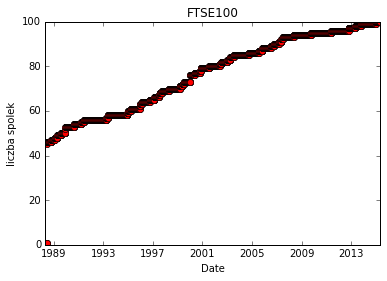

In [4]:
number_of_constituents_list = []
    
for date_index in range( len( Stock_values_dataframe ) ):
    number_of_constituents = 0
    for start_date in start_dates_constituents_list:
        if Stock_values_dataframe[ 'Date' ][ date_index ] > start_date:
            number_of_constituents += 1
    number_of_constituents_list.append( number_of_constituents )
    
    
#.date()
all_dates = [ dt.datetime.strptime( date, '%Y-%m-%d' ) for date in Stock_values_dataframe[ 'Date' ].tolist() ]
#y = range( len( x ) )

py.xlabel('Date')
py.ylabel('liczba spolek')
py.title('FTSE100')

#print( number_of_constituents_list )
py.plot( all_dates, number_of_constituents_list, 'ro' )
py.show()
#fig.savefig('/home/pawel/Documents/magisterka/Financial_historical_data/constituents100.jpg')
#py.clf()

1.C. Check completeness of the data. 

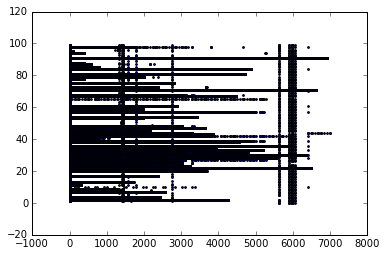

In [5]:
fig = py.figure()

already_started = False

x = []
y = []

for constituent_number in range( len( constituents_tickers) ):
    for date_index in range( len( Stock_values_dataframe ) ):
        if ( not already_started ) and ( Stock_values_dataframe.loc[ date_index, 
                                                                    constituents_tickers[ constituent_number ] ] == 
                Stock_values_dataframe.loc[ date_index, constituents_tickers[ constituent_number ] ] ):
            already_started = True
            
        if already_started: 
            if not ( Stock_values_dataframe.loc[ date_index, constituents_tickers[ constituent_number ] ] == 
                Stock_values_dataframe.loc[ date_index, constituents_tickers[ constituent_number ] ] ):
                #print( "missing value" )
                x.append( date_index )
                y.append( constituent_number )
                
py.scatter( x, y, s = 3 )

#fig.savefig('~/Dokumenty/education/studia_courses/laboratory_II_degree_physics/missing_data.jpg')
#py.clf()
py.show()
            

In [6]:
#py.scatter( x, y, s = 3 )
#py.show()

1.D. On y axis check does it contains all days except weekends?

In [14]:
start = datetime.datetime(1985, 1, 1)
end = datetime.datetime(2015, 4, 29)

dates_dataframe = pd.DataFrame( pd.date_range(start, end, freq='B') )

dates_dataframe.columns = [ "Date" ]
#print( dates_dataframe )

Stock_values_dataframe = pd.merge( Stock_values_dataframe, dates_dataframe, how = "right", on = 'Date')
#Stock_values_dataframe = Stock_values_dataframe.merge( dates_dataframe, how = 'outer', on = 'Date' )
#Stock_values_dataframe = dates_dataframe.merge( Stock_values_dataframe, how = 'outer', on = 'Date' )

#Stock_values_dataframe = pd.concat( [ Index_dataframe, Stock_values_dataframe ], axis=1 )

print( Stock_values_dataframe )

           Date  AAL.L  ABF.L  ADM.L  ADN.L  AGK.L  AHT.L  ANTO.L  ARM.L  \
0    1985-01-01    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
1    1985-01-02    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
2    1985-01-03    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
3    1985-01-04    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
4    1985-01-07    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
5    1985-01-08    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
6    1985-01-09    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
7    1985-01-10    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
8    1985-01-11    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
9    1985-01-14    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
10   1985-01-15    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
11   1985-01-16    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
12   1985-01

In [15]:
def num_missing( x ):
    return sum( x.isnull() )

print( Stock_values_dataframe.apply(num_missing, axis=0) )

Date         0
AAL.L     7912
ABF.L     7912
ADM.L     7912
ADN.L     7912
AGK.L     7912
AHT.L     7912
ANTO.L    7912
ARM.L     7912
AV.L      7912
AZN.L     7912
BA.L      7912
BAB.L     7912
BARC.L    7912
BATS.L    7912
BDEV.L    7912
BG.L      7912
BLND.L    7912
BLT.L     7912
BNZL.L    7912
BP.L      7912
BRBY.L    7912
BT-A.L    7912
CCH.L     7912
CCL.L     7912
CNA.L     7912
CPG.L     7912
CPI.L     7912
CRH.L     7912
DC.L      7912
          ... 
RIO.L     7912
RMG.L     7912
RR.L      7912
RRS.L     7912
RSA.L     7912
SAB.L     7912
SBRY.L    7912
SDR.L     7912
SGE.L     7912
SHP.L     7912
SKY.L     7912
SL.L      7912
SMIN.L    7912
SN.L      7912
SPD.L     7912
SSE.L     7912
STAN.L    7912
STJ.L     7912
SVT.L     7912
TPK.L     7912
TSCO.L    7912
TUI.L     7912
TW.L      7912
ULVR.L    7912
UU.L      7912
VOD.L     7912
WEIR.L    7912
WOS.L     7912
WPP.L     7912
WTB.L     7912
dtype: int64


### Idea
    To merge above I can use:
    result = df1.append(df4)

[How to merge idea here](http://pandas.pydata.org/pandas-docs/stable/merging.html)

### Note
    Dates in Date column in Stock_values_dataframe and dates_dataframe are different.